In [137]:
#Performing standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
df = pd.read_csv('Position_Salaries.csv')

In [139]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


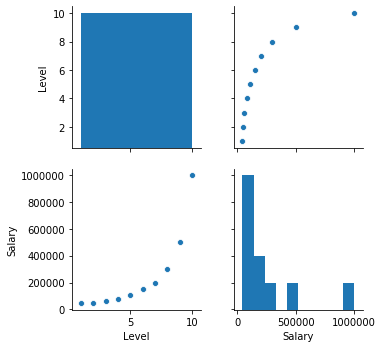

In [141]:
sns.pairplot(df)

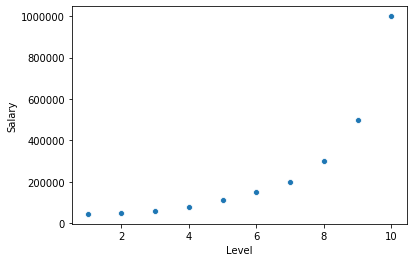

In [142]:
sns.scatterplot('Level','Salary',data=df)

In [164]:
X = df[['Level']].values
y = df[['Salary']].values

In [144]:
# Let's build Poylnomial regression model
from sklearn.preprocessing import PolynomialFeatures

In [145]:
pf = PolynomialFeatures(degree=4)

In [146]:
poly_x = pf.fit_transform(X)

In [147]:
# Predicting value using Linear regression model
from sklearn.linear_model import LinearRegression

In [148]:
lm = LinearRegression()
lm.fit(poly_x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
sns.scatterplot(df['Level'],y)
sns.lineplot(df['Level'],lm.predict(poly_x))

Exception: Data must be 1-dimensional

In [150]:
lm.predict(pf.transform(np.array([[6.5]])))

array([[158862.45265153]])

In [151]:
#SVR
from sklearn.svm import SVR


In [152]:
svr = SVR(kernel='rbf')

In [153]:
svr.fit(X,y)

C:\Users\BibhuJha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BibhuJha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

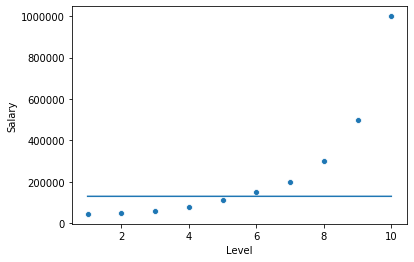

In [154]:
sns.scatterplot(df['Level'],df['Salary'])
sns.lineplot(df['Level'],svr.predict(X))

In [155]:
# We need to do feature scaling
from sklearn.preprocessing import StandardScaler

In [165]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [169]:
X = sc_x.fit_transform(X)
sc_x.inverse_transform(sc_x.fit_transform(np.array([[6.5]])))

array([[6.5]])

In [170]:
y = sc_y.fit_transform(y)

In [171]:
svr = SVR(kernel='rbf')
svr.fit(X,y)

C:\Users\BibhuJha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

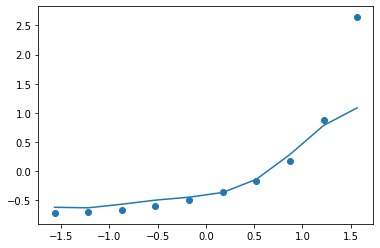

In [172]:
plt.scatter(X,y)
plt.plot(X,svr.predict(X))

In [176]:
sc_y.inverse_transform(svr.predict(sc_x.transform(np.array([[6.5]])))) 

array([131106.77303274])

array([0.01158103])